In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [12]:
import os
import platform

if os.access('torch_helpers.py', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl !wget https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/scripts/torch_helpers.py > torch_helpers.py
    else:
        !wget torch_helpers.py https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/scripts/torch_helpers.py

--2022-11-12 04:34:04--  http://torch_helpers.py/
Resolving torch_helpers.py (torch_helpers.py)... failed: Name or service not known.
wget: unable to resolve host address ‘torch_helpers.py’
--2022-11-12 04:34:04--  https://raw.githubusercontent.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/main/scripts/torch_helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23883 (23K) [text/plain]
Saving to: ‘torch_helpers.py’

torch_helpers.py    100%[===================>]  23.32K  --.-KB/s    in 0.002s  

2022-11-12 04:34:04 (13.2 MB/s) - ‘torch_helpers.py’ saved [23883/23883]

FINISHED --2022-11-12 04:34:04--
Total wall clock time: 0.2s
Downloaded: 1 files, 23K in 0.002s (13.2 MB/s)


In [14]:
!pip3 install torchinfo
from torchinfo import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
X = [[0.00, 0.010, 0.019]]
for i in range(20):
    rand = round(np.random.uniform(0, 0.05), 3)
    t = round(X[i][2] + rand, 3)
    r = list([X[i][1], X[i][2], t])
    X.append(r)

In [33]:
y = [X[i + 1][2] for i in range(20)]
X = X[:-1]

In [34]:
X

[[0.0, 0.01, 0.019],
 [0.01, 0.019, 0.039],
 [0.019, 0.039, 0.065],
 [0.039, 0.065, 0.073],
 [0.065, 0.073, 0.104],
 [0.073, 0.104, 0.119],
 [0.104, 0.119, 0.122],
 [0.119, 0.122, 0.172],
 [0.122, 0.172, 0.179],
 [0.172, 0.179, 0.212],
 [0.179, 0.212, 0.217],
 [0.212, 0.217, 0.231],
 [0.217, 0.231, 0.245],
 [0.231, 0.245, 0.281],
 [0.245, 0.281, 0.329],
 [0.281, 0.329, 0.365],
 [0.329, 0.365, 0.381],
 [0.365, 0.381, 0.399],
 [0.381, 0.399, 0.413],
 [0.399, 0.413, 0.421]]

In [5]:
def train(model, train_loader, valid_loader, optimizer, criterion, epochs=100):
    # Defino listas para realizar graficas de los resultados
    train_loss = []
    valid_loss = []

    # Defino mi loop de entrenamiento

    for epoch in range(epochs):

        epoch_train_loss = 0.0
        epoch_train_accuracy = 0.0

        for train_data, train_target in train_loader:

            # Seteo los gradientes en cero ya que, por defecto, PyTorch
            # los va acumulando
            optimizer.zero_grad()

            output = model(train_data)

            # Computo el error de la salida comparando contra las etiquetas
            loss = criterion(output, train_target)

            # Almaceno el error del batch para luego tener el error promedio de la epoca
            epoch_train_loss += loss.item()

            # Computo el nuevo set de gradientes a lo largo de toda la red
            loss.backward()

            # Realizo el paso de optimizacion actualizando los parametros de toda la red
            optimizer.step()

        # Calculo la media de error para la epoca de entrenamiento.
        # La longitud de train_loader es igual a la cantidad de batches dentro de una epoca.
        epoch_train_loss = epoch_train_loss / len(train_loader)
        train_loss.append(epoch_train_loss)

        # Realizo el paso de validación computando error y accuracy, y
        # almacenando los valores para imprimirlos y graficarlos
        valid_data, valid_target = iter(valid_loader).next()
        output = model(valid_data)
        
        epoch_valid_loss = criterion(output, valid_target).item()
        valid_loss.append(epoch_valid_loss)

        print(f"Epoch: {epoch+1}/{epochs} - Train loss {epoch_train_loss:.3f} - Valid Loss {epoch_valid_loss:.3f}")

    history = {
        "loss": train_loss,
        "val_loss": valid_loss,
    }
    return history

In [35]:
# Cada dato X lo transformarmos en una matriz de 1 fila 1 columna (1x1)
X = np.array(X).reshape(len(X), len(X[0]), 1)
print("datos X:", X)

datos X: [[[0.   ]
  [0.01 ]
  [0.019]]

 [[0.01 ]
  [0.019]
  [0.039]]

 [[0.019]
  [0.039]
  [0.065]]

 [[0.039]
  [0.065]
  [0.073]]

 [[0.065]
  [0.073]
  [0.104]]

 [[0.073]
  [0.104]
  [0.119]]

 [[0.104]
  [0.119]
  [0.122]]

 [[0.119]
  [0.122]
  [0.172]]

 [[0.122]
  [0.172]
  [0.179]]

 [[0.172]
  [0.179]
  [0.212]]

 [[0.179]
  [0.212]
  [0.217]]

 [[0.212]
  [0.217]
  [0.231]]

 [[0.217]
  [0.231]
  [0.245]]

 [[0.231]
  [0.245]
  [0.281]]

 [[0.245]
  [0.281]
  [0.329]]

 [[0.281]
  [0.329]
  [0.365]]

 [[0.329]
  [0.365]
  [0.381]]

 [[0.365]
  [0.381]
  [0.399]]

 [[0.381]
  [0.399]
  [0.413]]

 [[0.399]
  [0.413]
  [0.421]]]


In [37]:
# (batch size, seq_len, input_size)
X.shape

(20, 3, 1)

In [38]:
y = np.asanyarray(y)
y.shape

(20,)

In [90]:
class Data(Dataset):
    def __init__(self, x, y):
        # Convertir los arrays de numpy a tensores. 
        # pytorch espera en general entradas 32bits
        self.x = torch.from_numpy(x.astype(np.float32))
        # las loss unfction esperan la salida float
        self.y = torch.from_numpy(y.astype(np.float32)).float().view(-1, 1)

        self.len = self.y.shape[0]

    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

data_set = Data(X, y)

input_dim = data_set.x.shape[1:]
seq_length = input_dim[0]
input_size = input_dim[1]
print("Input dim", input_dim)
print("seq_length:", seq_length)
print("input_size:", input_size)

output_dim = data_set.y.shape[1]
print("Output dim", output_dim)

Input dim torch.Size([3, 1])
seq_length: 3
input_size: 1
Output dim 1


In [91]:
next(iter(data_set))

(tensor([[0.0000],
         [0.0100],
         [0.0190]]), tensor([0.0390]))

In [92]:
y[0]

0.039

In [93]:
torch.manual_seed(42)
valid_set_size = int(data_set.len * 0.2)
train_set_size = data_set.len - valid_set_size

# Cuando trabajmos con una serie temporal no mezclamos (shuffle) los datos
train_set = torch.utils.data.Subset(data_set, range(train_set_size))
valid_set = torch.utils.data.Subset(data_set, range(train_set_size, data_set.len))

print("Tamaño del conjunto de entrenamiento:", len(train_set))
print("Tamaño del conjunto de validacion:", len(valid_set))

train_loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=len(valid_set), shuffle=False)

Tamaño del conjunto de entrenamiento: 16
Tamaño del conjunto de validacion: 4


In [107]:
from torch_helpers import CustomLSTM

class Model1(nn.Module):
    def __init__(self, input_size, output_dim):
        super().__init__()
        self.lstm1 = CustomLSTM(input_size=input_size, hidden_size=64, activation=nn.ReLU()) # LSTM layer
        self.fc = nn.Linear(in_features=64, out_features=output_dim) #  # Fully connected layer
        
    def forward(self, x):
        lstm_output, _ = self.lstm1(x)
        out = self.fc(lstm_output[:,-1,:]) # take last output (last seq)
        return out

model1 = Model1(input_size=input_size, output_dim=output_dim)

# Crear el optimizador la una función de error
model1_optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
model1_criterion = nn.MSELoss()  # mean squared error

summary(model1, input_size=(1, seq_length, input_size))

Layer (type:depth-idx)                   Output Shape              Param #
Model1                                   [1, 1]                    --
├─CustomLSTM: 1-1                        [1, 3, 64]                16,896
│    └─Sigmoid: 2-1                      [1, 64]                   --
│    └─Sigmoid: 2-2                      [1, 64]                   --
│    └─ReLU: 2-3                         [1, 64]                   --
│    └─Sigmoid: 2-4                      [1, 64]                   --
│    └─ReLU: 2-5                         [1, 64]                   --
│    └─Sigmoid: 2-6                      [1, 64]                   --
│    └─Sigmoid: 2-7                      [1, 64]                   --
│    └─ReLU: 2-8                         [1, 64]                   --
│    └─Sigmoid: 2-9                      [1, 64]                   --
│    └─ReLU: 2-10                        [1, 64]                   --
│    └─Sigmoid: 2-11                     [1, 64]                   --
│    └─Sigm

In [108]:
history1 = train(model1,
                train_loader,
                valid_loader,
                model1_optimizer,
                model1_criterion,
                epochs=500
                )

Epoch: 1/500 - Train loss 0.019 - Valid Loss 0.097
Epoch: 2/500 - Train loss 0.019 - Valid Loss 0.094
Epoch: 3/500 - Train loss 0.018 - Valid Loss 0.092
Epoch: 4/500 - Train loss 0.017 - Valid Loss 0.090
Epoch: 5/500 - Train loss 0.017 - Valid Loss 0.088
Epoch: 6/500 - Train loss 0.016 - Valid Loss 0.086
Epoch: 7/500 - Train loss 0.016 - Valid Loss 0.084
Epoch: 8/500 - Train loss 0.015 - Valid Loss 0.082
Epoch: 9/500 - Train loss 0.015 - Valid Loss 0.080
Epoch: 10/500 - Train loss 0.014 - Valid Loss 0.078
Epoch: 11/500 - Train loss 0.014 - Valid Loss 0.076
Epoch: 12/500 - Train loss 0.013 - Valid Loss 0.074
Epoch: 13/500 - Train loss 0.013 - Valid Loss 0.072
Epoch: 14/500 - Train loss 0.013 - Valid Loss 0.070
Epoch: 15/500 - Train loss 0.012 - Valid Loss 0.068
Epoch: 16/500 - Train loss 0.012 - Valid Loss 0.067
Epoch: 17/500 - Train loss 0.012 - Valid Loss 0.065
Epoch: 18/500 - Train loss 0.011 - Valid Loss 0.063
Epoch: 19/500 - Train loss 0.011 - Valid Loss 0.062
Epoch: 20/500 - Train

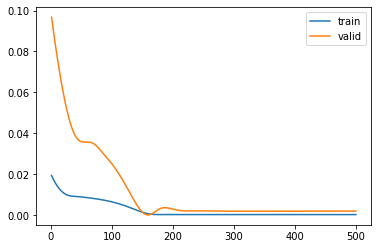

In [109]:
epoch_count = range(1, len(history1['loss']) + 1)
sns.lineplot(x=epoch_count,  y=history1['loss'], label='train')
sns.lineplot(x=epoch_count,  y=history1['val_loss'], label='valid')
plt.show()

In [110]:
# Ensayo
x_test = [y[-3], y[-2], y[-1]]
preds = []
for i in range(10):

  if i != 0:
      x_test = [x_test[-2], x_test[-1], preds[-1]]

  test_input = np.array(x_test)
  test_input = test_input.reshape((1, seq_length, input_size))
  test_input = torch.from_numpy(test_input.astype(np.float32))

  y_hat = model1(test_input).detach().numpy()
  preds.append(y_hat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [101]:
preds

[array([[0.5410771]], dtype=float32),
 array([[0.6065118]], dtype=float32),
 array([[0.70872545]], dtype=float32),
 array([[0.8687689]], dtype=float32),
 array([[1.0877287]], dtype=float32),
 array([[1.4591755]], dtype=float32),
 array([[2.1581287]], dtype=float32),
 array([[3.686888]], dtype=float32),
 array([[7.7305684]], dtype=float32),
 array([[19.09575]], dtype=float32)]

In [111]:
preds

[array([[0.50389487]], dtype=float32),
 array([[0.5295889]], dtype=float32),
 array([[0.56736445]], dtype=float32),
 array([[0.6153339]], dtype=float32),
 array([[0.6547185]], dtype=float32),
 array([[0.70270264]], dtype=float32),
 array([[0.75568086]], dtype=float32),
 array([[0.8117021]], dtype=float32),
 array([[0.8784789]], dtype=float32),
 array([[0.95683193]], dtype=float32)]

In [106]:
idx = 18
x_test = X[idx]
x_test

test_input = np.array(x_test)
test_input = test_input.reshape((1, seq_length, input_size))
test_input = torch.from_numpy(test_input.astype(np.float32))

y_hat = model1(test_input)
print(y_hat)
print(y[idx])

tensor([[0.4990]], grad_fn=<AddmmBackward0>)
0.421


In [80]:
y

array([0.039, 0.065, 0.073, 0.104, 0.119, 0.122, 0.172, 0.179, 0.212,
       0.217, 0.231, 0.245, 0.281, 0.329, 0.365, 0.381, 0.399, 0.413,
       0.421, 0.444])

In [72]:
X[5]

array([[0.073],
       [0.104],
       [0.119]])

In [51]:
x_test.detach().numpy()

AttributeError: ignored

In [19]:
import matplotlib.pyplot as plt

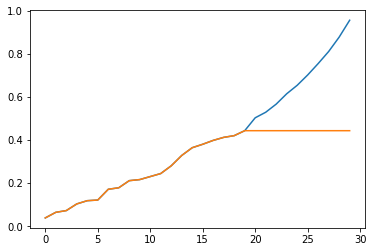

In [121]:

mes = np.arange(0, 30, 1)
old_out = np.concatenate((y, np.full((1, 10), y[-1])), axis = None)
new_out = np.concatenate((y, preds), axis = None)
plt.plot(mes, new_out)
plt.plot(mes, old_out)
plt.show()

In [116]:
np.full((1, 10), y[-1])

array([[0.444, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444, 0.444,
        0.444]])

In [31]:
y[1:] - y[:-1]

array([0.007, 0.057, 0.009, 0.024, 0.058, 0.049, 0.047, 0.017, 0.074,
       0.065, 0.064, 0.049, 0.062, 0.044, 0.063, 0.057, 0.075, 0.044,
       0.065])